In [54]:
import pandas as pd
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
metadata_path = '../../data/metadata/'
sim_data_path = '../../data/unigram/'
master_path = '../../data/master_tables'

In [71]:
fandom_list = [line.strip() for line in open('../../data/fandom_filtered_list')]

In [129]:
df = pd.read_csv(os.path.join(metadata_path,'arthurian_mythology_&_related_fandoms'+'_metadata.tsv'), sep = '\t')

In [130]:
df.head(2)

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Language,Notes,PublishDate,Rating,Relationship,Summary,Title,URL,UpdateDate,Words
0,"Plot What Plot/Porn Without Plot, Vaginal Fing...",Underage,MorganasCrow,0,F/F,NaN,1,"Morgana (Merlin), Morgause (Merlin)",0,2015-06-16,...,English,NaN,2015-06-16,Explicit,Morcest,Morgana and Morgause enjoy wild games.,What The Fag You Think You\'re Doing?,http://archiveofourown.org/works/4146375?view_...,NaN,933.0
1,"blind!Arthur, Blindness, Minor Violence, Impli...",Creator Chose Not To Use Archive Warnings,SoCanonItHurts,4,M/M,NaN,1,"Merlin (Merlin), Arthur Pendragon (Merlin), Gw...",0,NaN,...,English,"Warning: I know nothing about being blind, all...",2016-04-17,Mature,"Merlin/Arthur Pendragon, Gwaine/Merlin (Merlin...",Merlin has a wonderful night with a mysteriou...,Obstacles in Our Way,http://archiveofourown.org/works/6575791?view_...,2016-04-16,1317.0


In [81]:
def create_df(fname):
    ### Create table: merge the one with JSD and the master table w/ old KL
    ### Only keep the numeric variables
    df = pd.read_csv(os.path.join(sim_data_path,fname+'_unigram_dist_jsd.tsv'), sep = '\t')
    df2 = pd.read_csv(os.path.join(master_path,fname+'_processed2.tsv'), sep = '\t')
    df2 = df2.drop([0,1])
    df = df[['Author', 'Title', 'JSD']]
    df = pd.merge(df, df2, on=['Author','Title'], how='inner')
    df = df[['Bookmarks','Chapters', 'Hits', 'Kudos', 'Words','Comments','CompleteDate','PublishDate','JSD']]
    df = df.fillna(0)
    return df

In [82]:
df_all = []
for fandom in fandom_list:
    # for some we don't have the master table.
    try:
        df_all.append(create_df(fandom))
        print ('did: ', fandom)
    except:
        pass
df_all = pd.concat(df_all)

did:  arthurian_mythology_&_related_fandoms
did:  attack_on_titan


/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


did:  ms_paint_adventures
did:  bishoujo_senshi_sailor_moon
did:  naruto
did:  buffy_the_vampire_slayer
did:  dcu
did:  one_direction
did:  doctor_who_&_related_fandoms
did:  dragon_age_all_media_types
did:  haikyuu
did:  shakespare_william_works
did:  hamilton_miranda
did:  sherlock_holmes_&_related_fandoms
did:  hetalia_axis_powers
did:  star_wars_all_media_types
did:  homestuck
did:  kuroko_no_basuke
did:  the_walking_dead_&_related_fandoms
did:  les_miserables_all_media_types
did:  tolkien_j_r_r_works_&_related_fandoms


In [83]:
len(df_all)

68587

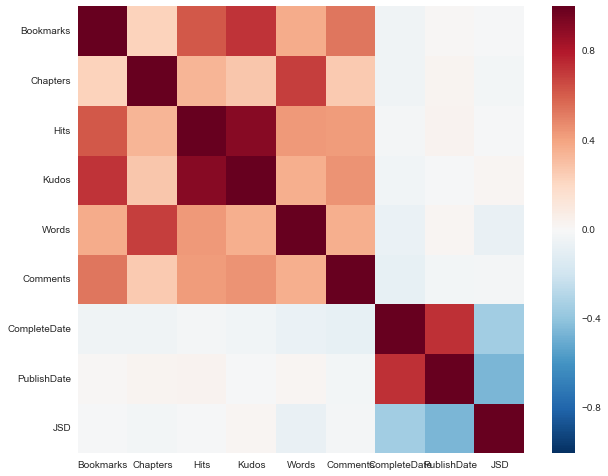

In [84]:
# plt.matshow(df.corr())
plt.figure(figsize = (10,8))
sns.heatmap(df_all.astype(float).corr())
# plt.tight_layout()
# plt.savefig('corr_heatmap.png', format='png')


In [91]:
rand_data = sm.datasets.randhie.load()
rand_exog = rand_data.exog.view(float).reshape(len(rand_data.exog), -1)
rand_exog = sm.add_constant(rand_exog, prepend=False)

In [92]:
rand_exog.shape

(20190, 10)

In [93]:
rand_data.endog.shape

(20190,)

In [110]:
mod_nbin = sm.NegativeBinomial(rand_data.endog, rand_exog)
res_nbin = mod_nbin.fit(disp=False)
print(res_nbin.summary())

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                20190
Model:               NegativeBinomial   Df Residuals:                    20180
Method:                           MLE   Df Model:                            9
Date:                Tue, 06 Jun 2017   Pseudo R-squ.:                 0.01845
Time:                        19:51:03   Log-Likelihood:                -43384.
converged:                      False   LL-Null:                       -44199.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0580      0.006     -9.517      0.000        -0.070    -0.046
x2            -0.2678      0.023    -11.802      0.000        -0.312    -0.223
x3             0.0412      0.004      9.937      0.0

In [100]:
df_all.head()

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,CompleteDate,PublishDate,JSD
0,4.0,3.0,1505.0,33.0,3124.0,6,0,1167,0.8381656448336969
1,7.0,10.0,1348.0,40.0,10470.0,4,1061,1071,1.1338849631299288
2,1.0,10.0,548.0,16.0,8751.0,6,0,610,0.6298721265841052
3,18.0,10.0,3119.0,55.0,23266.0,30,979,1190,0.8963401290998967
4,0.0,10.0,98.0,1.0,8618.0,0,685,704,1.113333705504798


In [126]:
df_all = df_all.astype(float)
for col in df_all.columns.values:
    df_all[col] = (df_all[col] - df_all[col].mean())/df_all[col].std(ddof=0)

In [127]:
df_all.to_csv('regression_data.csv', index=False)

In [122]:
exog = df_all[['Bookmarks','Chapters', 'Hits', 'Words','Comments','CompleteDate','PublishDate','JSD']].astype(float).as_matrix()
endog = df_all['Kudos'].astype(float).as_matrix()
mod_nbin = sm.NegativeBinomial(endog, exog)
res_nbin = mod_nbin.fit()
print(res_nbin.summary())

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                68587
Model:               NegativeBinomial   Df Residuals:                    68579
Method:                           MLE   Df Model:                            7
Date:                Tue, 06 Jun 2017   Pseudo R-squ.:                     nan
Time:                        20:12:21   Log-Likelihood:                    nan
converged:                      False   LL-Null:                   -4.0027e+05
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1                nan        nan        nan        nan           nan       nan
x2                nan        nan        nan        nan           nan       nan
x3                nan        nan        nan        n